## 911 Call Trends Analyzer


For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

- lat : String variable, Latitude
- lng: String variable, Longitude
- desc: String variable, Description of the Emergency Call
- zip: String variable, Zipcode
- title: String variable, Title
- timeStamp: String variable, YYYY-MM-DD HH:MM:SS
- twp: String variable, Township
- addr: String variable, Address
- e: String variable, Dummy variable (always 1)


### Data & Setup


_Import numpy and pandas_


In [83]:
import numpy as np
import pandas as pd

_Import visualization libraries and set %matplotlib inline._


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

_Read in the csv file as a dataframe called df_


In [85]:
df = pd.read_csv("911.csv")
df.drop(labels="e", axis=1, inplace=True)

_Check the info() of the df_


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
dtypes: float64(3), object(5)
memory usage: 17.7+ MB


_Check the head of df_


In [87]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE


### Basic Questions


_What are the top 5 zipcodes for 911 calls?_


In [88]:
# df['zip'].value_counts().iloc[:5]
df["zip"].value_counts().head(5)

zip
19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: count, dtype: int64

_What are the top 5 townships (twp) for 911 calls?_


In [89]:
# df["twp"].value_counts().iloc[:5]
df["twp"].value_counts().head(5)

twp
LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: count, dtype: int64

_Take a look at the 'title' column, how many unique title codes are there?_


In [90]:
df["title"].nunique()

131

### Creating new features


_In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value._

_For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS._


In [91]:
df["Reason"] = df["title"].apply(lambda title: title.split(":")[0])
df["Reason"].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

_What is the most common Reason for a 911 call based off of this new column?_


In [92]:
df["Reason"].value_counts()

Reason
EMS        144362
Traffic    101889
Fire        42989
Name: count, dtype: int64

_Now use seaborn to create a countplot of 911 calls by Reason._


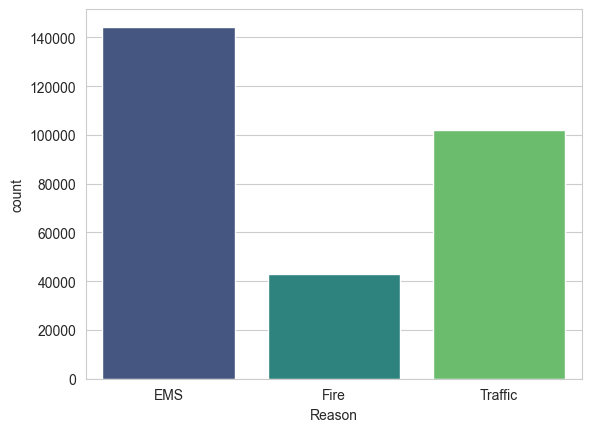

In [93]:
sns.countplot(x="Reason", hue="Reason", data=df, palette="viridis", legend=False)
plt.show()

_Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?_


In [94]:
type(df["timeStamp"].iloc[0])

str

_You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects._


In [95]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

_You can now grab specific attributes from a Datetime object by calling them. For example:_

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**


In [96]:
df["Hour"] = df["timeStamp"].apply(lambda time: time.hour)
df["Month"] = df["timeStamp"].apply(lambda time: time.month)
df["Day of Week"] = df["timeStamp"].apply(lambda time: time.dayofweek)

In [97]:
df.sample()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
55027,40.086567,-75.166432,EASTON RD & RAMP S EASTON RD TO RT309 SB; CHE...,NaN,EMS: SEIZURES,2016-05-02 11:15:58,CHELTENHAM,EASTON RD & RAMP S EASTON RD TO RT309 SB,EMS,11,5,0


_Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:_

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [98]:
dmap = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

In [99]:
df["Day of Week"] = df["Day of Week"].map(dmap)

_Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column._


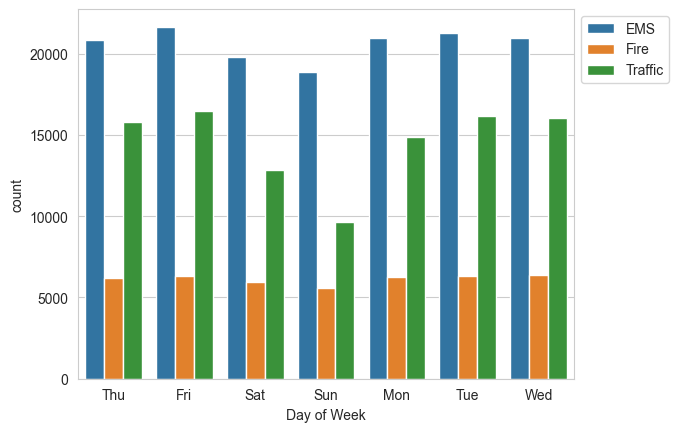

In [117]:
# sns.countplot(x="Day of Week", data=df, hue="Reason", palette="viridis")
# # To relocate the legend
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

sns.countplot(x="Day of Week", hue="Reason", data=df)
plt.legend(bbox_to_anchor=(1, 1))

_Now do the same for Month:_


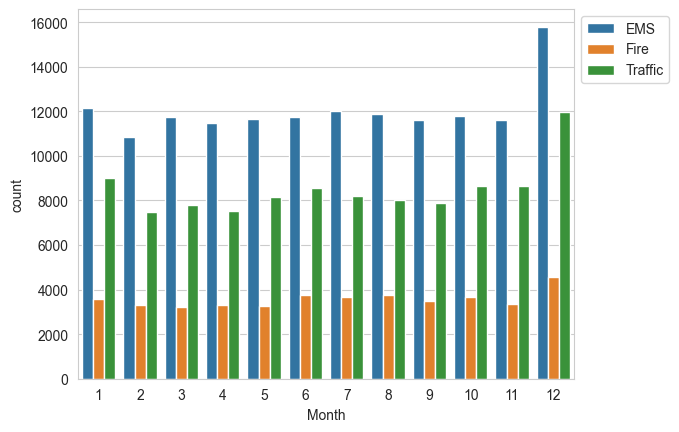

In [101]:
sns.countplot(x="Month", hue="Reason", data=df)
plt.legend(bbox_to_anchor=(1, 1))

_Did you notice something strange about the Plot?_


_You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas..._


#### It is missing some months! 9,10, and 11 are not there.


_Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame._


In [102]:
byMonth = df.groupby(by="Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093


_Now create a simple plot off of the dataframe indicating the count of calls per month._


<Axes: xlabel='Month'>

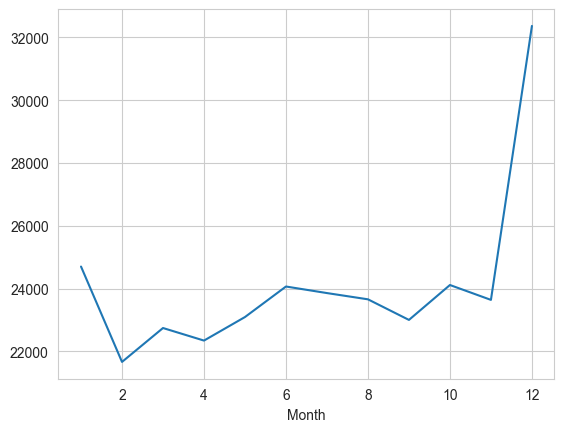

In [103]:
# Could be any column
byMonth["lat"].plot()

<Axes: xlabel='Month', ylabel='lat'>

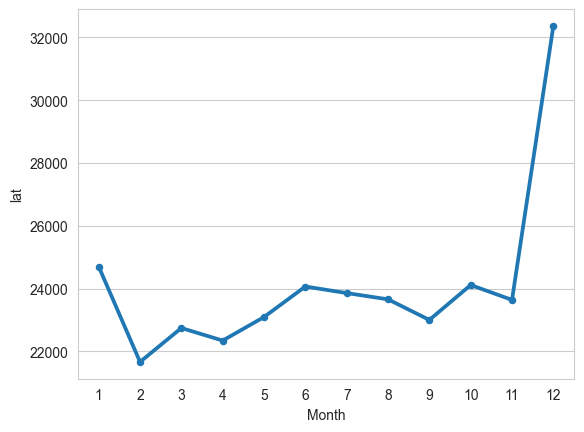

In [104]:
sns.pointplot(x=byMonth.index, y="lat", data=byMonth, markers=".")

_Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column._


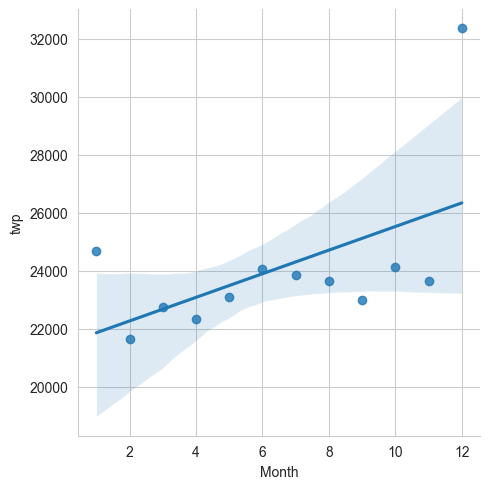

In [119]:
sns.lmplot(x="Month", y="twp", data=byMonth.reset_index())

_Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method._


In [121]:
df["Date"] = df["timeStamp"].apply(lambda time: time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,16,12,Thu,2015-12-10


_Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls._


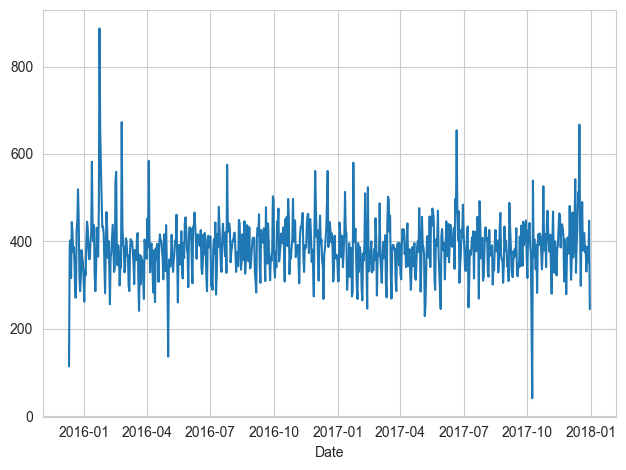

In [122]:
df.groupby(by="Date").count()["lat"].plot()
plt.tight_layout()

_Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call_


Text(0.5, 1.0, 'Traffic')

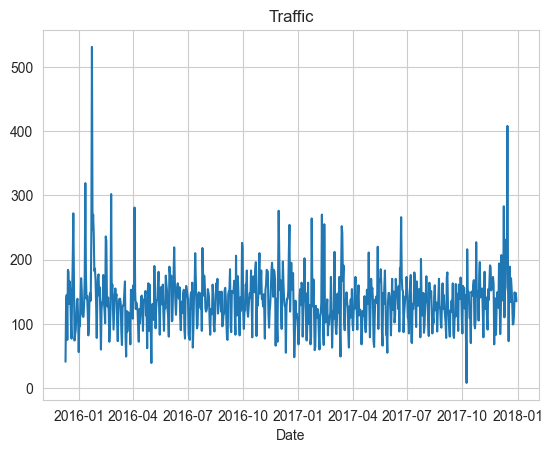

In [125]:
df[df["Reason"] == "Traffic"].groupby(by="Date").count()["lat"].plot()
plt.title("Traffic")

Text(0.5, 1.0, 'Fire')

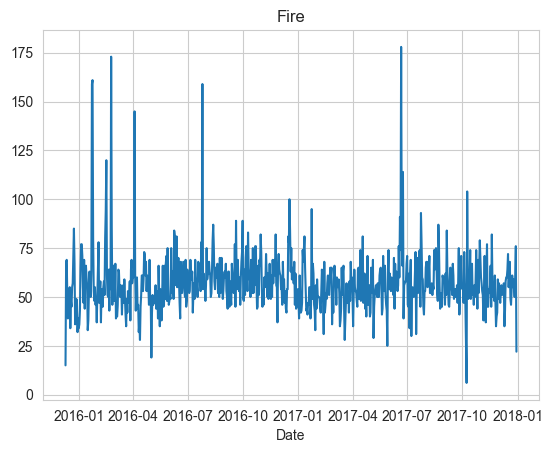

In [126]:
df[df['Reason']=='Fire'].groupby(by='Date').count()['lat'].plot()
plt.title('Fire')

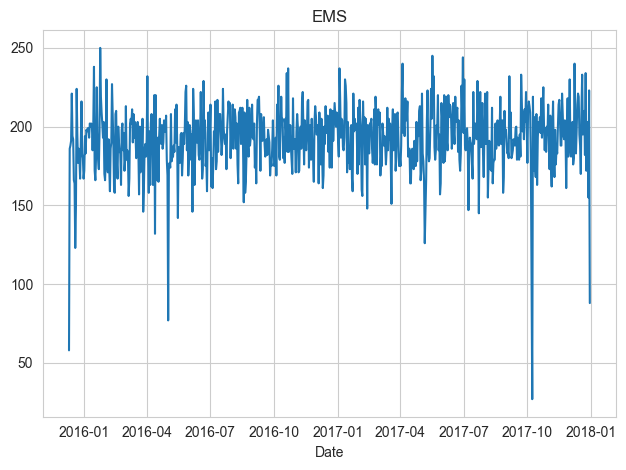

In [110]:
df[df['Reason']=='EMS'].groupby(by='Date').count()['lat'].plot()
plt.title('EMS')

* Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!


In [127]:
dfGrid = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
dfGrid = dfGrid.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dfGrid

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,1031,922,868,716,629,658,801,1050,1324,1665,...,2033,1925,1970,1984,1947,1817,1569,1376,1064,979
Mon,810,638,577,524,611,761,1155,1954,2425,2496,...,2468,2714,2796,2833,2437,1976,1714,1345,1165,895
Tue,774,635,570,537,557,771,1217,2007,2537,2481,...,2638,2846,3018,2970,2573,2044,1771,1516,1187,918
Wed,715,656,564,563,501,716,1256,2061,2357,2405,...,2631,2771,3025,3115,2490,2038,1834,1522,1261,994
Thu,771,616,659,526,516,722,1215,1984,2305,2405,...,2592,2752,2729,3018,2447,1998,1748,1554,1235,1015
Fri,786,688,617,576,540,695,1136,1854,2169,2252,...,2729,2977,3114,3027,2405,2199,1890,1647,1559,1229
Sat,992,867,808,699,644,686,842,1118,1450,1860,...,2342,2294,2268,2231,2185,2044,1771,1619,1429,1313


*Now create a HeatMap using this new DataFrame.*


<Axes: xlabel='Hour', ylabel='Day of Week'>

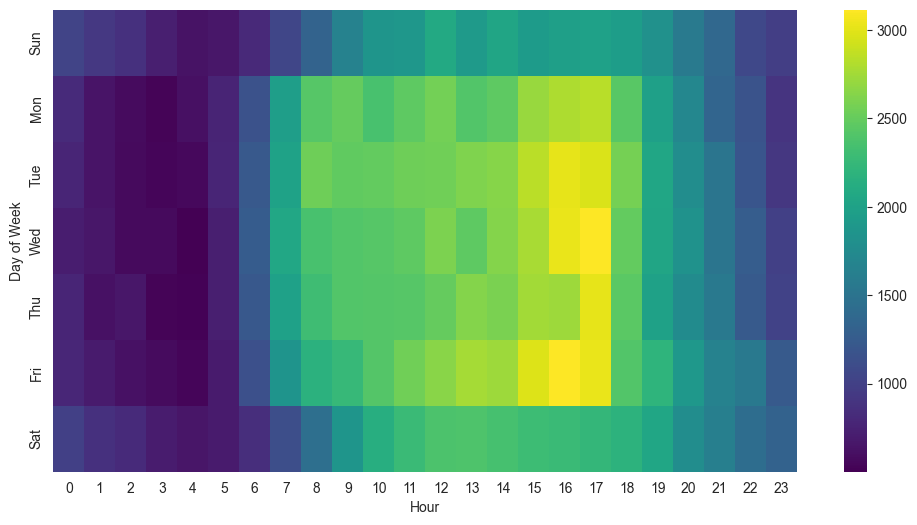

In [128]:
plt.figure(figsize=(12,6))
sns.heatmap(dfGrid, cmap='viridis')

*Now create a clustermap using this DataFrame.*


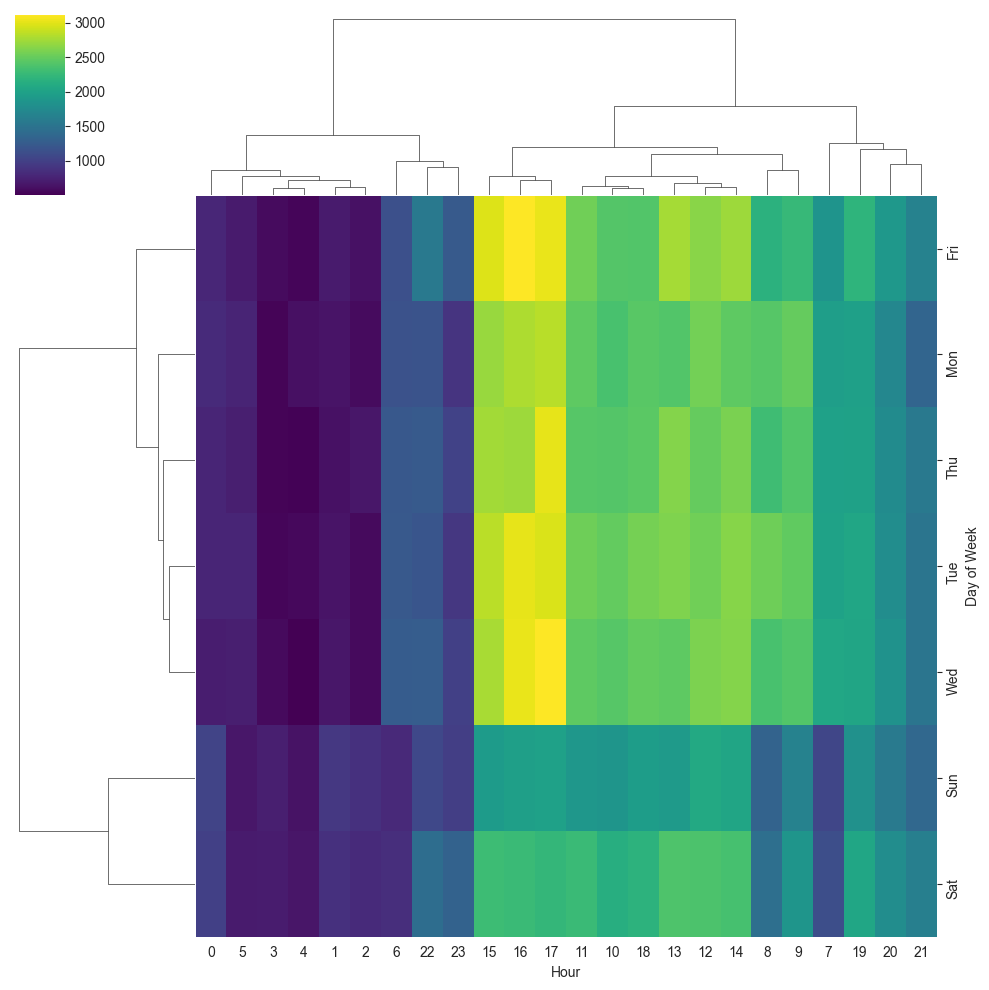

In [129]:
sns.clustermap(dfGrid, cmap='viridis')

*Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.*


In [130]:
dfMonth = df.groupby(['Day of Week','Month']).count()['lat'].unstack()
dfMonth = dfMonth.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dfMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Sun,3470,2339,2229,3026,2580,2679,3259,2658,2565,3172,2592,3504
Mon,3706,3552,3103,3088,3538,3264,3687,3325,3031,4250,3262,4286
Tue,3953,3160,3529,3065,3991,3376,3213,4044,3142,3689,3891,4691
Wed,3336,3381,3902,3003,3653,3880,3198,4016,3191,3338,4067,4477
Thu,3182,3189,3909,3097,3289,4095,3248,3507,3702,3189,3478,4899
Fri,3527,3171,3532,3574,3278,3747,3736,3297,4226,3433,3377,5570
Sat,3527,2871,2539,3490,2764,3024,3515,2810,3144,3042,2972,4939


<Axes: xlabel='Month', ylabel='Day of Week'>

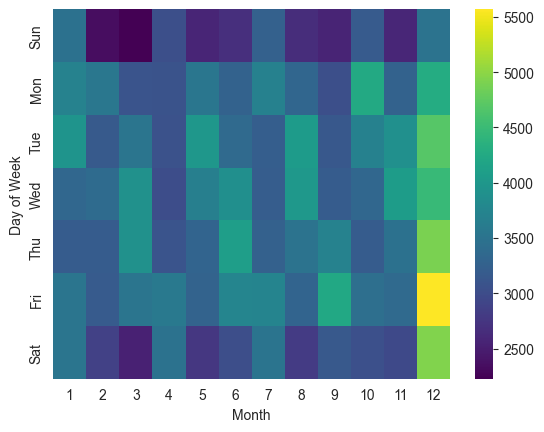

In [131]:
plt.figure(dpi=100)
sns.heatmap(dfMonth, cmap='viridis')

<Figure size 640x480 with 0 Axes>

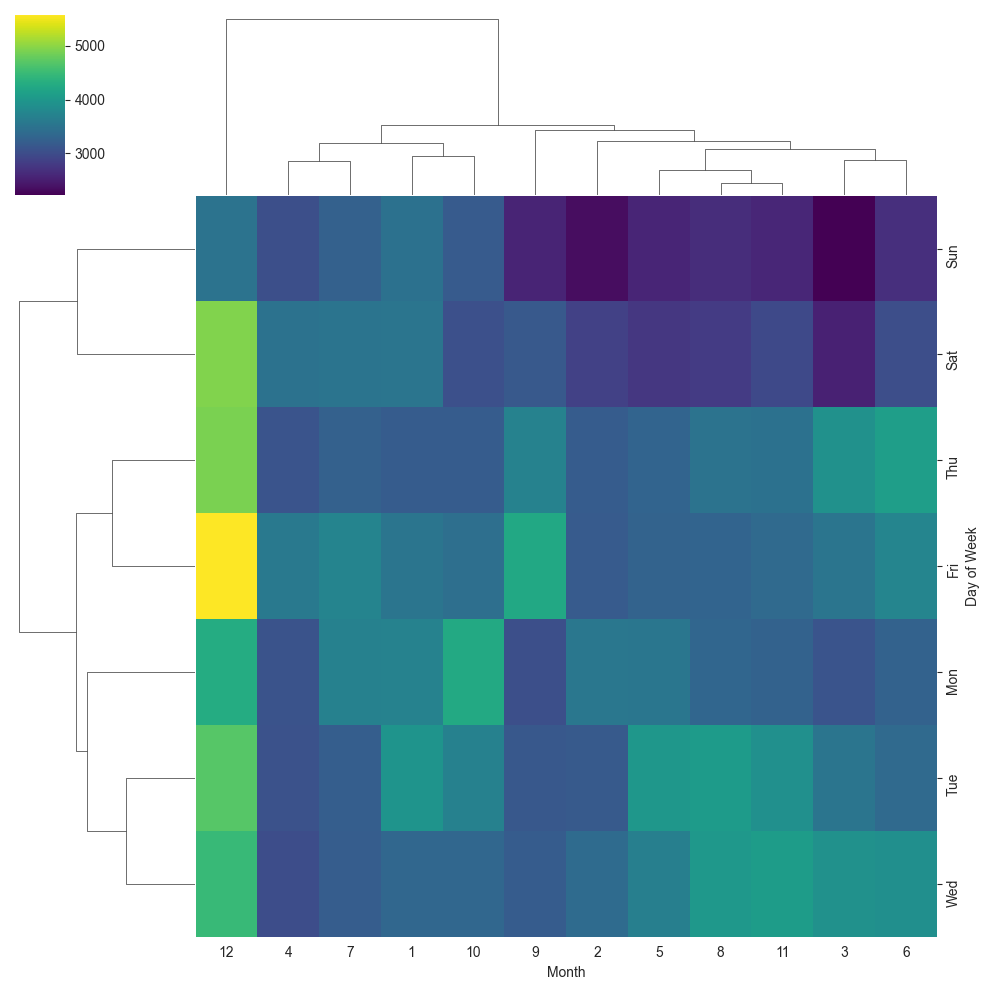

In [132]:
plt.figure(dpi=100)
sns.clustermap(dfMonth, cmap='viridis')